## Importing the relevant packages

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from scipy.stats.distributions import chi2 

from math import sqrt
import seaborn as sns
sns.set()

 plot_pacf

## Importing the Dengue Data 

In [33]:
dengue_dhf = pd.read_csv("dengue.csv") 
dengue_dhf.date = pd.to_datetime(dengue_dhf.date, dayfirst = True)
dengue_dhf.set_index("date", inplace=True)
#dengue_df=dengue_df.asfreq('b')
#df_comp=df_comp.fillna(method='ffill')

In [6]:
dengue_dhf.head()

,type_dengue,year,month,number
date,,,,
2014-01-06,Dengue,2014,1,436.0
2014-01-06,DHF,2014,1,1.0
2014-01-13,Dengue,2014,1,479.0
2014-01-13,DHF,2014,1,0.0
2014-01-20,Dengue,2014,1,401.0


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
dengue_df=dengue_dhf.loc[dengue_dhf['type_dengue']=='Dengue'].drop(columns=['type_dengue'])

In [75]:
dengue_df.head()

,year,month,number
date,,,
2014-01-06,2014,1,436.0
2014-01-13,2014,1,479.0
2014-01-20,2014,1,401.0
2014-01-27,2014,1,336.0
2014-02-03,2014,2,234.0


In [6]:
#del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
size = int(len(dengue_df)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

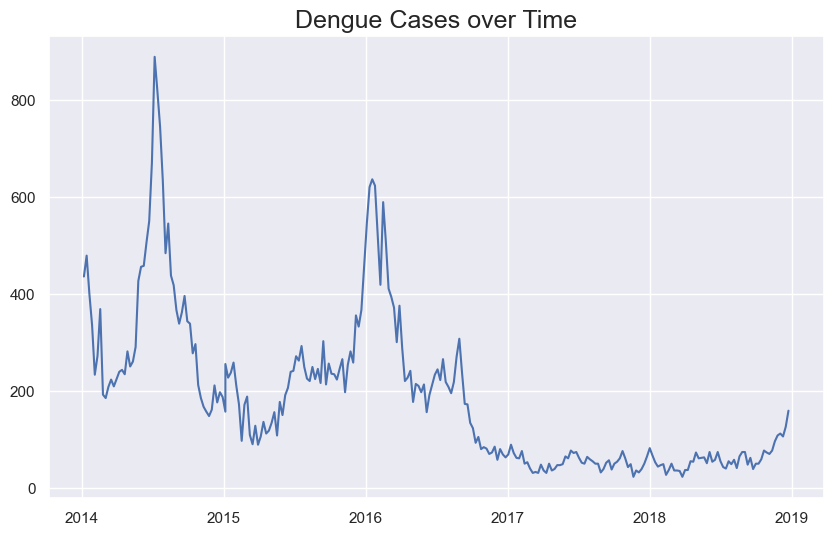

In [38]:
# Data Visualization for Dengue Cases
plt.figure(figsize=(10,6))
plt.plot(dengue_df['number'])
plt.title(label = 'Dengue Cases over Time', fontsize=18)
plt.show();

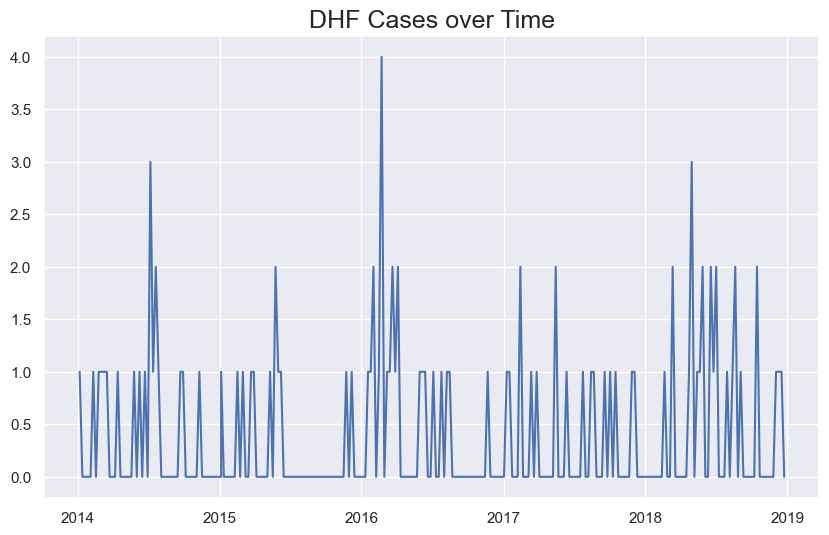

In [23]:
# Data Visualization for DHF
plt.figure(figsize=(10,6))
plt.plot(dengue_df[dengue_df['type_dengue']=='DHF']['number'])
plt.title(label = 'DHF Cases over Time', fontsize=18)
plt.show();

In [70]:
# Apply Dickey-Fuller test to 'Dengue' column
result = adfuller(dengue_df['number'])

# Print test statistic, p-value, and critical values
print(f'Test statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical values:')
for k, v in result[4].items():
    print(f'   {k}: {v}')

Test statistic: -2.4488469192517934
p-value: 0.12842146204596122
Critical values:
   1%: -3.456780859712
   5%: -2.8731715065600003
   10%: -2.572968544


Analysis: Dengue Cases is non-stationary.

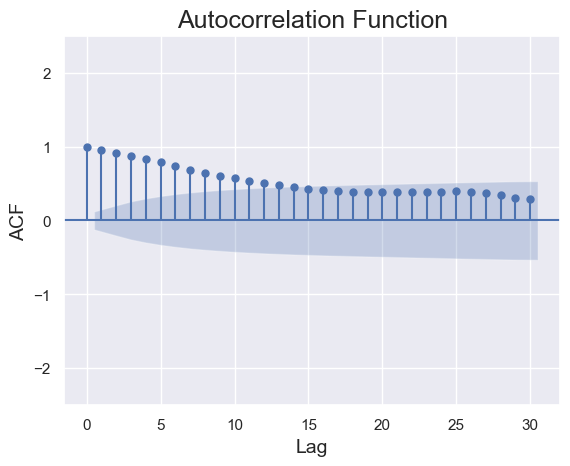

In [68]:
# Plot the ACF
plot_acf(dengue_df['number'], lags=30)
plt.title('Autocorrelation Function', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('ACF', fontsize=14)
plt.ylim(-2.5,2.5)
plt.show();

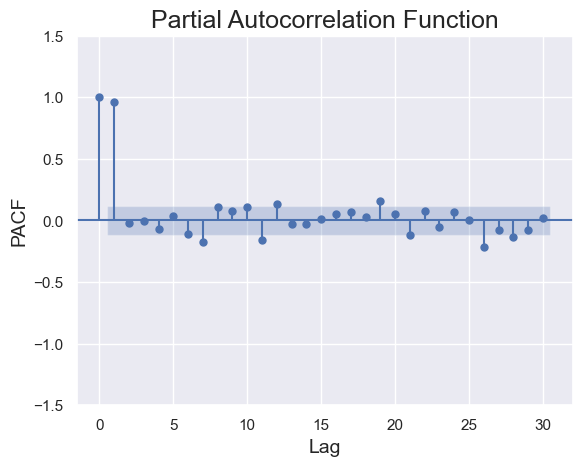

In [69]:
# Plot the PACF 
plot_pacf(dengue_df['number'], lags=30)
plt.title('Partial Autocorrelation Function', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('PACF', fontsize=14)
plt.ylim(-1.5,1.5)
plt.show();

In [76]:
# Create a new column with the first difference of 'Dengue' cases
dengue_df['number'] = dengue_df['number'].diff()

In [80]:
dengue_df.dropna(inplace=True)

In [81]:
dengue_df.head()

,year,month,number
date,,,
2014-01-13,2014,1,43.0
2014-01-20,2014,1,-78.0
2014-01-27,2014,1,-65.0
2014-02-03,2014,2,-102.0
2014-02-10,2014,2,39.0


In [82]:
# Apply Dickey-Fuller test to 'Dengue' column after 1st difference
result = adfuller(dengue_df['number'])

# Print test statistic, p-value, and critical values
print(f'Test statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical values:')
for k, v in result[4].items():
    print(f'   {k}: {v}')

Test statistic: -5.371381207301816
p-value: 3.8889591571052315e-06
Critical values:
   1%: -3.4568881317725864
   5%: -2.8732185133016057
   10%: -2.5729936189738876


Analysis: After 1st differencing, the differenced data set is stationary.

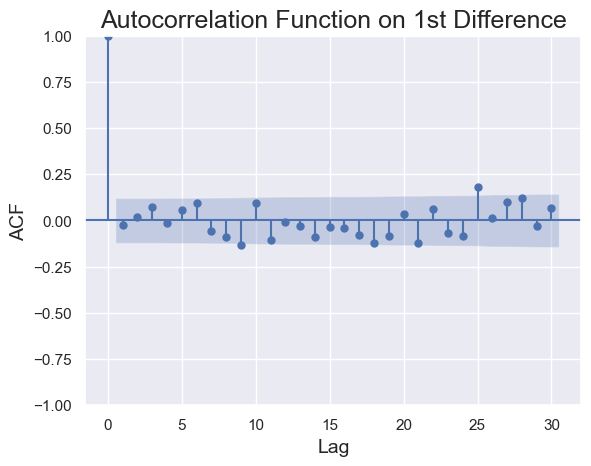

In [84]:
# Plot the ACF after 1st Difference
plot_acf(dengue_df['number'], lags=30)
plt.title('Autocorrelation Function on 1st Difference', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('ACF', fontsize=14)
plt.ylim(-1,1)
plt.show();

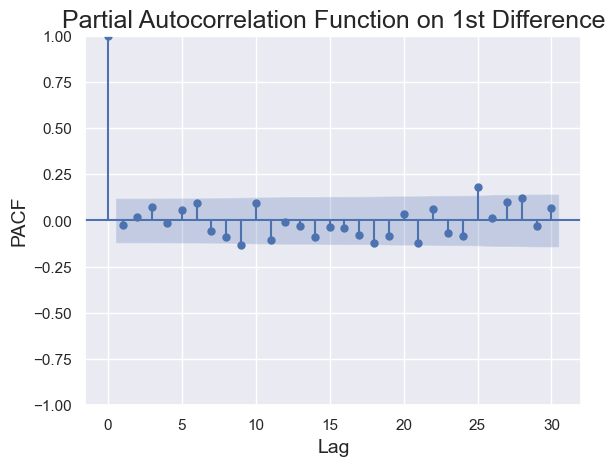

In [85]:
# Plot the PACF after 1st Difference
plot_acf(dengue_df['number'], lags=30)
plt.title('Partial Autocorrelation Function on 1st Difference', fontsize=18)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('PACF', fontsize=14)
plt.ylim(-1,1)
plt.show();